In [2]:
set scheme s1mono

In [4]:
use ./formatted_data/master.dta, clear
// import delimited "/Users/santerivaataja/Desktop/Taloustieteen_kursseja/Econometrics/Capstone.nosync/Econometrics-Capstone/raw_data/master.csv", clear // bindquote(nobind)

In [8]:
sort country year
bysort country: gen democracy_chg = democracy - democracy[_n - 1]



(66 missing values generated)


In [10]:
qui {
    preserve
    collapse (sum) democracy, by(year)
    line democracy year if year >= 1970, ysc(r(50 150)) ytitle("Number of democratic states") //ylabel(50(10)150)
    graph export "saved_outputs/n_dem.pdf", replace
    restore
}

r(621);
r(621);


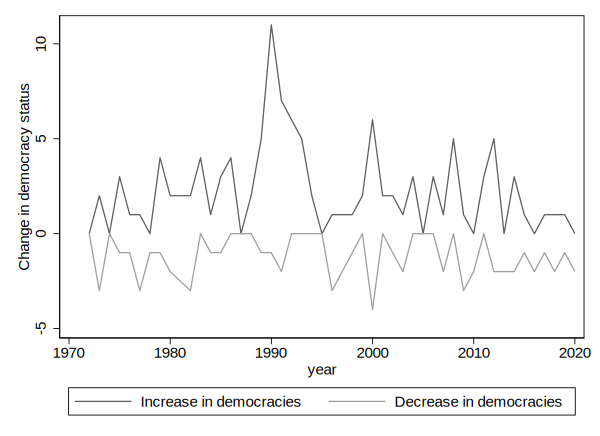

In [5]:
qui {
    preserve
    egen new_dem = group(year democracy_chg) if democracy_chg == 1, label
    egen not_dem = group(year democracy_chg) if democracy_chg == -1, label
    collapse (count) new_dem (count) not_dem, by(year)
    replace not_dem = -not_dem
    twoway line new_dem year if year >= 1970 || /// 
        line not_dem year if year >= 1970, ///
        ytitle("Change in democracy status") ///
        legend(label(1 "Increase in democracies") label(2 "Decrease in democracies"))
    graph export "saved_outputs/change_in_dem.pdf", replace
    restore
}